### **Table 3 of "Digital Safety Nets: How Social Networks Shape Online Medical Crowdfunding Performance"**
#### **The Monte Carlo Experiment**
#### Author: Xu Han, Yiqing Xing, Junjian Yi, Haochen Zhang
#### Code author: Xu Han

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
from scipy.optimize import minimize

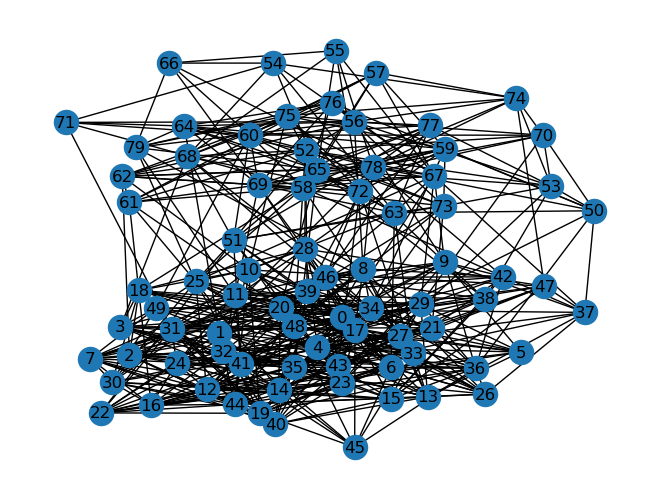

In [2]:
G = nx.random_partition_graph([50,30], 0.3, 0.05)
nx.draw(G,with_labels=True)

In [3]:
def hhi(p):
    hhi=0
    total=sum(p)
    for x in p:
        hhi+=(x/total)**2
    return hhi

In [4]:
p1=[900,100,0,0,0,0,0,0,0,0]
p2=[650,200,100,50,0,0,0,0,0,0]
p3=[500,300,100,50,50,0,0,0,0,0]
p4=[350,300,100,100,50,50,50,0,0,0]
p5=[200,300,100,100,50,50,50,50,50,50]
print(hhi(p1),hhi(p2),hhi(p3),hhi(p4),hhi(p5))

0.8200000000000001 0.47500000000000003 0.355 0.24 0.16500000000000004


In [5]:
def simulation(H,p_in,p_out,view):
    spe=[] #specifications of depth distribution
    v=1000/view
    spe.append([int(x / v) for x in p1])
    spe.append([int(x / v) for x in p2])
    spe.append([int(x / v) for x in p3])
    spe.append([int(x / v) for x in p4])
    spe.append([int(x / v) for x in p5])
    mean=[0]*len(spe)
    N=100
    M=100
    max_d=10
    for seed in range(N):
        print("round:",seed)
        #if seed%10==0:
            #print("round:",seed+1)
        G = nx.random_partition_graph([1000-H,H], p_in, p_out, seed) #underlying network
        #nx.draw(G, with_labels=True)
        for seed_b in range(M):
            random.seed(seed_b)
            homophily_count=[0]*len(spe)
            layer_sampled_nodes=[[] for _ in range(len(spe))]
            for s in range(len(spe)):
                layer_sampled_nodes[s].append(random.choices(list(G.adj[0]),k=spe[s][0])) #Spread to depth 1
                homophily_count[s]+=len(list(filter(lambda x: x >= 1000-H, layer_sampled_nodes[s][0]))) #Count the number of high-SES
                for i in range(max_d):
                    if i==0:
                        continue
                    temp=[]
                    for j in layer_sampled_nodes[s][i-1]:
                        temp=temp+list(G.adj[j]) #Collect the neighbors of each viewer in depth i-1 (with duplication)
                    sample=random.choices(temp,k=spe[s][i]) #Spread to depth i
                    layer_sampled_nodes[s].append(sample)
                    homophily_count[s]+=len(list(filter(lambda x: x >= 1000-H, sample))) #Count the number of high-SES in depth i
                    #print(homophily_count)
                mean[s]+=homophily_count[s] #Accumulate the number of high-SES
    for i in range(len(spe)):
        mean[i]=mean[i]/(N*M*view) #Compute the average high-SES proportion
    return mean

In [6]:
simulation(300,0.3,0.1,100)

round: 0
round: 1
round: 2
round: 3
round: 4
round: 5
round: 6
round: 7
round: 8
round: 9
round: 10
round: 11
round: 12
round: 13
round: 14
round: 15
round: 16
round: 17
round: 18
round: 19
round: 20
round: 21
round: 22
round: 23
round: 24
round: 25
round: 26
round: 27
round: 28
round: 29
round: 30
round: 31
round: 32
round: 33
round: 34
round: 35
round: 36
round: 37
round: 38
round: 39
round: 40
round: 41
round: 42
round: 43
round: 44
round: 45
round: 46
round: 47
round: 48
round: 49
round: 50
round: 51
round: 52
round: 53
round: 54
round: 55
round: 56
round: 57
round: 58
round: 59
round: 60
round: 61
round: 62
round: 63
round: 64
round: 65
round: 66
round: 67
round: 68
round: 69
round: 70
round: 71
round: 72
round: 73
round: 74
round: 75
round: 76
round: 77
round: 78
round: 79
round: 80
round: 81
round: 82
round: 83
round: 84
round: 85
round: 86
round: 87
round: 88
round: 89
round: 90
round: 91
round: 92
round: 93
round: 94
round: 95
round: 96
round: 97
round: 98
round: 99


[0.131977, 0.136907, 0.150898, 0.158426, 0.16522]

In [12]:
simulation(300,0.3,0.1,500)

round: 0
round: 1
round: 2
round: 3
round: 4
round: 5
round: 6
round: 7
round: 8
round: 9
round: 10
round: 11
round: 12
round: 13
round: 14
round: 15
round: 16
round: 17
round: 18
round: 19
round: 20
round: 21
round: 22
round: 23
round: 24
round: 25
round: 26
round: 27
round: 28
round: 29
round: 30
round: 31
round: 32
round: 33
round: 34
round: 35
round: 36
round: 37
round: 38
round: 39
round: 40
round: 41
round: 42
round: 43
round: 44
round: 45
round: 46
round: 47
round: 48
round: 49
round: 50
round: 51
round: 52
round: 53
round: 54
round: 55
round: 56
round: 57
round: 58
round: 59
round: 60
round: 61
round: 62
round: 63
round: 64
round: 65
round: 66
round: 67
round: 68
round: 69
round: 70
round: 71
round: 72
round: 73
round: 74
round: 75
round: 76
round: 77
round: 78
round: 79
round: 80
round: 81
round: 82
round: 83
round: 84
round: 85
round: 86
round: 87
round: 88
round: 89
round: 90
round: 91
round: 92
round: 93
round: 94
round: 95
round: 96
round: 97
round: 98
round: 99


[0.1310012, 0.1404774, 0.14699, 0.1533474, 0.1647]

In [13]:
simulation(300,0.3,0.1,1000)

round: 0
round: 1
round: 2
round: 3
round: 4
round: 5
round: 6
round: 7
round: 8
round: 9
round: 10
round: 11
round: 12
round: 13
round: 14
round: 15
round: 16
round: 17
round: 18
round: 19
round: 20
round: 21
round: 22
round: 23
round: 24
round: 25
round: 26
round: 27
round: 28
round: 29
round: 30
round: 31
round: 32
round: 33
round: 34
round: 35
round: 36
round: 37
round: 38
round: 39
round: 40
round: 41
round: 42
round: 43
round: 44
round: 45
round: 46
round: 47
round: 48
round: 49
round: 50
round: 51
round: 52
round: 53
round: 54
round: 55
round: 56
round: 57
round: 58
round: 59
round: 60
round: 61
round: 62
round: 63
round: 64
round: 65
round: 66
round: 67
round: 68
round: 69
round: 70
round: 71
round: 72
round: 73
round: 74
round: 75
round: 76
round: 77
round: 78
round: 79
round: 80
round: 81
round: 82
round: 83
round: 84
round: 85
round: 86
round: 87
round: 88
round: 89
round: 90
round: 91
round: 92
round: 93
round: 94
round: 95
round: 96
round: 97
round: 98
round: 99


[0.1309409, 0.1398302, 0.1484707, 0.1553562, 0.1648226]

In [14]:
simulation(300,0.3,0.3,100)

round: 0
round: 1
round: 2
round: 3
round: 4
round: 5
round: 6
round: 7
round: 8
round: 9
round: 10
round: 11
round: 12
round: 13
round: 14
round: 15
round: 16
round: 17
round: 18
round: 19
round: 20
round: 21
round: 22
round: 23
round: 24
round: 25
round: 26
round: 27
round: 28
round: 29
round: 30
round: 31
round: 32
round: 33
round: 34
round: 35
round: 36
round: 37
round: 38
round: 39
round: 40
round: 41
round: 42
round: 43
round: 44
round: 45
round: 46
round: 47
round: 48
round: 49
round: 50
round: 51
round: 52
round: 53
round: 54
round: 55
round: 56
round: 57
round: 58
round: 59
round: 60
round: 61
round: 62
round: 63
round: 64
round: 65
round: 66
round: 67
round: 68
round: 69
round: 70
round: 71
round: 72
round: 73
round: 74
round: 75
round: 76
round: 77
round: 78
round: 79
round: 80
round: 81
round: 82
round: 83
round: 84
round: 85
round: 86
round: 87
round: 88
round: 89
round: 90
round: 91
round: 92
round: 93
round: 94
round: 95
round: 96
round: 97
round: 98
round: 99


[0.293533, 0.292975, 0.304105, 0.300942, 0.300951]

In [7]:
simulation(300,0.3,0.05,100)

round: 0
round: 1
round: 2
round: 3
round: 4
round: 5
round: 6
round: 7
round: 8
round: 9
round: 10
round: 11
round: 12
round: 13
round: 14
round: 15
round: 16
round: 17
round: 18
round: 19
round: 20
round: 21
round: 22
round: 23
round: 24
round: 25
round: 26
round: 27
round: 28
round: 29
round: 30
round: 31
round: 32
round: 33
round: 34
round: 35
round: 36
round: 37
round: 38
round: 39
round: 40
round: 41
round: 42
round: 43
round: 44
round: 45
round: 46
round: 47
round: 48
round: 49
round: 50
round: 51
round: 52
round: 53
round: 54
round: 55
round: 56
round: 57
round: 58
round: 59
round: 60
round: 61
round: 62
round: 63
round: 64
round: 65
round: 66
round: 67
round: 68
round: 69
round: 70
round: 71
round: 72
round: 73
round: 74
round: 75
round: 76
round: 77
round: 78
round: 79
round: 80
round: 81
round: 82
round: 83
round: 84
round: 85
round: 86
round: 87
round: 88
round: 89
round: 90
round: 91
round: 92
round: 93
round: 94
round: 95
round: 96
round: 97
round: 98
round: 99


[0.075533, 0.076308, 0.085759, 0.089639, 0.093008]

In [8]:
simulation(300,0.5,0.1,100)

round: 0
round: 1
round: 2
round: 3
round: 4
round: 5
round: 6
round: 7
round: 8
round: 9
round: 10
round: 11
round: 12
round: 13
round: 14
round: 15
round: 16
round: 17
round: 18
round: 19
round: 20
round: 21
round: 22
round: 23
round: 24
round: 25
round: 26
round: 27
round: 28
round: 29
round: 30
round: 31
round: 32
round: 33
round: 34
round: 35
round: 36
round: 37
round: 38
round: 39
round: 40
round: 41
round: 42
round: 43
round: 44
round: 45
round: 46
round: 47
round: 48
round: 49
round: 50
round: 51
round: 52
round: 53
round: 54
round: 55
round: 56
round: 57
round: 58
round: 59
round: 60
round: 61
round: 62
round: 63
round: 64
round: 65
round: 66
round: 67
round: 68
round: 69
round: 70
round: 71
round: 72
round: 73
round: 74
round: 75
round: 76
round: 77
round: 78
round: 79
round: 80
round: 81
round: 82
round: 83
round: 84
round: 85
round: 86
round: 87
round: 88
round: 89
round: 90
round: 91
round: 92
round: 93
round: 94
round: 95
round: 96
round: 97
round: 98
round: 99


[0.087522, 0.089552, 0.098581, 0.104142, 0.106811]

In [9]:
simulation(300,0.5,0.3,100)

round: 0
round: 1
round: 2
round: 3
round: 4
round: 5
round: 6
round: 7
round: 8
round: 9
round: 10
round: 11
round: 12
round: 13
round: 14
round: 15
round: 16
round: 17
round: 18
round: 19
round: 20
round: 21
round: 22
round: 23
round: 24
round: 25
round: 26
round: 27
round: 28
round: 29
round: 30
round: 31
round: 32
round: 33
round: 34
round: 35
round: 36
round: 37
round: 38
round: 39
round: 40
round: 41
round: 42
round: 43
round: 44
round: 45
round: 46
round: 47
round: 48
round: 49
round: 50
round: 51
round: 52
round: 53
round: 54
round: 55
round: 56
round: 57
round: 58
round: 59
round: 60
round: 61
round: 62
round: 63
round: 64
round: 65
round: 66
round: 67
round: 68
round: 69
round: 70
round: 71
round: 72
round: 73
round: 74
round: 75
round: 76
round: 77
round: 78
round: 79
round: 80
round: 81
round: 82
round: 83
round: 84
round: 85
round: 86
round: 87
round: 88
round: 89
round: 90
round: 91
round: 92
round: 93
round: 94
round: 95
round: 96
round: 97
round: 98
round: 99


[0.207754, 0.208676, 0.230218, 0.235212, 0.240349]

In [10]:
simulation(300,0.5,0.05,100)

round: 0
round: 1
round: 2
round: 3
round: 4
round: 5
round: 6
round: 7
round: 8
round: 9
round: 10
round: 11
round: 12
round: 13
round: 14
round: 15
round: 16
round: 17
round: 18
round: 19
round: 20
round: 21
round: 22
round: 23
round: 24
round: 25
round: 26
round: 27
round: 28
round: 29
round: 30
round: 31
round: 32
round: 33
round: 34
round: 35
round: 36
round: 37
round: 38
round: 39
round: 40
round: 41
round: 42
round: 43
round: 44
round: 45
round: 46
round: 47
round: 48
round: 49
round: 50
round: 51
round: 52
round: 53
round: 54
round: 55
round: 56
round: 57
round: 58
round: 59
round: 60
round: 61
round: 62
round: 63
round: 64
round: 65
round: 66
round: 67
round: 68
round: 69
round: 70
round: 71
round: 72
round: 73
round: 74
round: 75
round: 76
round: 77
round: 78
round: 79
round: 80
round: 81
round: 82
round: 83
round: 84
round: 85
round: 86
round: 87
round: 88
round: 89
round: 90
round: 91
round: 92
round: 93
round: 94
round: 95
round: 96
round: 97
round: 98
round: 99


[0.047907, 0.048152, 0.054896, 0.055706, 0.05893]

In [11]:
simulation(300,0.1,0.05,100)

round: 0
round: 1
round: 2
round: 3
round: 4
round: 5
round: 6
round: 7
round: 8
round: 9
round: 10
round: 11
round: 12
round: 13
round: 14
round: 15
round: 16
round: 17
round: 18
round: 19
round: 20
round: 21
round: 22
round: 23
round: 24
round: 25
round: 26
round: 27
round: 28
round: 29
round: 30
round: 31
round: 32
round: 33
round: 34
round: 35
round: 36
round: 37
round: 38
round: 39
round: 40
round: 41
round: 42
round: 43
round: 44
round: 45
round: 46
round: 47
round: 48
round: 49
round: 50
round: 51
round: 52
round: 53
round: 54
round: 55
round: 56
round: 57
round: 58
round: 59
round: 60
round: 61
round: 62
round: 63
round: 64
round: 65
round: 66
round: 67
round: 68
round: 69
round: 70
round: 71
round: 72
round: 73
round: 74
round: 75
round: 76
round: 77
round: 78
round: 79
round: 80
round: 81
round: 82
round: 83
round: 84
round: 85
round: 86
round: 87
round: 88
round: 89
round: 90
round: 91
round: 92
round: 93
round: 94
round: 95
round: 96
round: 97
round: 98
round: 99


[0.184085, 0.187866, 0.205229, 0.211076, 0.215614]

In [15]:
simulation(500,0.3,0.1,100)

round: 0
round: 1
round: 2
round: 3
round: 4
round: 5
round: 6
round: 7
round: 8
round: 9
round: 10
round: 11
round: 12
round: 13
round: 14
round: 15
round: 16
round: 17
round: 18
round: 19
round: 20
round: 21
round: 22
round: 23
round: 24
round: 25
round: 26
round: 27
round: 28
round: 29
round: 30
round: 31
round: 32
round: 33
round: 34
round: 35
round: 36
round: 37
round: 38
round: 39
round: 40
round: 41
round: 42
round: 43
round: 44
round: 45
round: 46
round: 47
round: 48
round: 49
round: 50
round: 51
round: 52
round: 53
round: 54
round: 55
round: 56
round: 57
round: 58
round: 59
round: 60
round: 61
round: 62
round: 63
round: 64
round: 65
round: 66
round: 67
round: 68
round: 69
round: 70
round: 71
round: 72
round: 73
round: 74
round: 75
round: 76
round: 77
round: 78
round: 79
round: 80
round: 81
round: 82
round: 83
round: 84
round: 85
round: 86
round: 87
round: 88
round: 89
round: 90
round: 91
round: 92
round: 93
round: 94
round: 95
round: 96
round: 97
round: 98
round: 99


[0.259596, 0.29607, 0.338529, 0.368467, 0.398493]

In [16]:
simulation(500,0.3,0.1,500)

round: 0
round: 1
round: 2
round: 3
round: 4
round: 5
round: 6
round: 7
round: 8
round: 9
round: 10
round: 11
round: 12
round: 13
round: 14
round: 15
round: 16
round: 17
round: 18
round: 19
round: 20
round: 21
round: 22
round: 23
round: 24
round: 25
round: 26
round: 27
round: 28
round: 29
round: 30
round: 31
round: 32
round: 33
round: 34
round: 35
round: 36
round: 37
round: 38
round: 39
round: 40
round: 41
round: 42
round: 43
round: 44
round: 45
round: 46
round: 47
round: 48
round: 49
round: 50
round: 51
round: 52
round: 53
round: 54
round: 55
round: 56
round: 57
round: 58
round: 59
round: 60
round: 61
round: 62
round: 63
round: 64
round: 65
round: 66
round: 67
round: 68
round: 69
round: 70
round: 71
round: 72
round: 73
round: 74
round: 75
round: 76
round: 77
round: 78
round: 79
round: 80
round: 81
round: 82
round: 83
round: 84
round: 85
round: 86
round: 87
round: 88
round: 89
round: 90
round: 91
round: 92
round: 93
round: 94
round: 95
round: 96
round: 97
round: 98
round: 99


[0.263358, 0.3048596, 0.3275366, 0.3616502, 0.4025142]

In [17]:
simulation(500,0.3,0.1,1000)

round: 0
round: 1
round: 2
round: 3
round: 4
round: 5
round: 6
round: 7
round: 8
round: 9
round: 10
round: 11
round: 12
round: 13
round: 14
round: 15
round: 16
round: 17
round: 18
round: 19
round: 20
round: 21
round: 22
round: 23
round: 24
round: 25
round: 26
round: 27
round: 28
round: 29
round: 30
round: 31
round: 32
round: 33
round: 34
round: 35
round: 36
round: 37
round: 38
round: 39
round: 40
round: 41
round: 42
round: 43
round: 44
round: 45
round: 46
round: 47
round: 48
round: 49
round: 50
round: 51
round: 52
round: 53
round: 54
round: 55
round: 56
round: 57
round: 58
round: 59
round: 60
round: 61
round: 62
round: 63
round: 64
round: 65
round: 66
round: 67
round: 68
round: 69
round: 70
round: 71
round: 72
round: 73
round: 74
round: 75
round: 76
round: 77
round: 78
round: 79
round: 80
round: 81
round: 82
round: 83
round: 84
round: 85
round: 86
round: 87
round: 88
round: 89
round: 90
round: 91
round: 92
round: 93
round: 94
round: 95
round: 96
round: 97
round: 98
round: 99


[0.2645624, 0.3040369, 0.32991, 0.3653427, 0.4028365]

In [18]:
simulation(500,0.3,0.3,100)

round: 0
round: 1
round: 2
round: 3
round: 4
round: 5
round: 6
round: 7
round: 8
round: 9
round: 10
round: 11
round: 12
round: 13
round: 14
round: 15
round: 16
round: 17
round: 18
round: 19
round: 20
round: 21
round: 22
round: 23
round: 24
round: 25
round: 26
round: 27
round: 28
round: 29
round: 30
round: 31
round: 32
round: 33
round: 34
round: 35
round: 36
round: 37
round: 38
round: 39
round: 40
round: 41
round: 42
round: 43
round: 44
round: 45
round: 46
round: 47
round: 48
round: 49
round: 50
round: 51
round: 52
round: 53
round: 54
round: 55
round: 56
round: 57
round: 58
round: 59
round: 60
round: 61
round: 62
round: 63
round: 64
round: 65
round: 66
round: 67
round: 68
round: 69
round: 70
round: 71
round: 72
round: 73
round: 74
round: 75
round: 76
round: 77
round: 78
round: 79
round: 80
round: 81
round: 82
round: 83
round: 84
round: 85
round: 86
round: 87
round: 88
round: 89
round: 90
round: 91
round: 92
round: 93
round: 94
round: 95
round: 96
round: 97
round: 98
round: 99


[0.493138, 0.493252, 0.506829, 0.498594, 0.498179]

In [19]:
simulation(500,0.3,0.05,100)

round: 0
round: 1
round: 2
round: 3
round: 4
round: 5
round: 6
round: 7
round: 8
round: 9
round: 10
round: 11
round: 12
round: 13
round: 14
round: 15
round: 16
round: 17
round: 18
round: 19
round: 20
round: 21
round: 22
round: 23
round: 24
round: 25
round: 26
round: 27
round: 28
round: 29
round: 30
round: 31
round: 32
round: 33
round: 34
round: 35
round: 36
round: 37
round: 38
round: 39
round: 40
round: 41
round: 42
round: 43
round: 44
round: 45
round: 46
round: 47
round: 48
round: 49
round: 50
round: 51
round: 52
round: 53
round: 54
round: 55
round: 56
round: 57
round: 58
round: 59
round: 60
round: 61
round: 62
round: 63
round: 64
round: 65
round: 66
round: 67
round: 68
round: 69
round: 70
round: 71
round: 72
round: 73
round: 74
round: 75
round: 76
round: 77
round: 78
round: 79
round: 80
round: 81
round: 82
round: 83
round: 84
round: 85
round: 86
round: 87
round: 88
round: 89
round: 90
round: 91
round: 92
round: 93
round: 94
round: 95
round: 96
round: 97
round: 98
round: 99


[0.15419, 0.186041, 0.220193, 0.259979, 0.301569]

In [20]:
simulation(500,0.5,0.1,100)

round: 0
round: 1
round: 2
round: 3
round: 4
round: 5
round: 6
round: 7
round: 8
round: 9
round: 10
round: 11
round: 12
round: 13
round: 14
round: 15
round: 16
round: 17
round: 18
round: 19
round: 20
round: 21
round: 22
round: 23
round: 24
round: 25
round: 26
round: 27
round: 28
round: 29
round: 30
round: 31
round: 32
round: 33
round: 34
round: 35
round: 36
round: 37
round: 38
round: 39
round: 40
round: 41
round: 42
round: 43
round: 44
round: 45
round: 46
round: 47
round: 48
round: 49
round: 50
round: 51
round: 52
round: 53
round: 54
round: 55
round: 56
round: 57
round: 58
round: 59
round: 60
round: 61
round: 62
round: 63
round: 64
round: 65
round: 66
round: 67
round: 68
round: 69
round: 70
round: 71
round: 72
round: 73
round: 74
round: 75
round: 76
round: 77
round: 78
round: 79
round: 80
round: 81
round: 82
round: 83
round: 84
round: 85
round: 86
round: 87
round: 88
round: 89
round: 90
round: 91
round: 92
round: 93
round: 94
round: 95
round: 96
round: 97
round: 98
round: 99


[0.178557, 0.213136, 0.251733, 0.291005, 0.326036]

In [21]:
simulation(500,0.5,0.3,100)

round: 0
round: 1
round: 2
round: 3
round: 4
round: 5
round: 6
round: 7
round: 8
round: 9
round: 10
round: 11
round: 12
round: 13
round: 14
round: 15
round: 16
round: 17
round: 18
round: 19
round: 20
round: 21
round: 22
round: 23
round: 24
round: 25
round: 26
round: 27
round: 28
round: 29
round: 30
round: 31
round: 32
round: 33
round: 34
round: 35
round: 36
round: 37
round: 38
round: 39
round: 40
round: 41
round: 42
round: 43
round: 44
round: 45
round: 46
round: 47
round: 48
round: 49
round: 50
round: 51
round: 52
round: 53
round: 54
round: 55
round: 56
round: 57
round: 58
round: 59
round: 60
round: 61
round: 62
round: 63
round: 64
round: 65
round: 66
round: 67
round: 68
round: 69
round: 70
round: 71
round: 72
round: 73
round: 74
round: 75
round: 76
round: 77
round: 78
round: 79
round: 80
round: 81
round: 82
round: 83
round: 84
round: 85
round: 86
round: 87
round: 88
round: 89
round: 90
round: 91
round: 92
round: 93
round: 94
round: 95
round: 96
round: 97
round: 98
round: 99


[0.376204, 0.404569, 0.436045, 0.443541, 0.46375]

In [22]:
simulation(500,0.5,0.05,100)

round: 0
round: 1
round: 2
round: 3
round: 4
round: 5
round: 6
round: 7
round: 8
round: 9
round: 10
round: 11
round: 12
round: 13
round: 14
round: 15
round: 16
round: 17
round: 18
round: 19
round: 20
round: 21
round: 22
round: 23
round: 24
round: 25
round: 26
round: 27
round: 28
round: 29
round: 30
round: 31
round: 32
round: 33
round: 34
round: 35
round: 36
round: 37
round: 38
round: 39
round: 40
round: 41
round: 42
round: 43
round: 44
round: 45
round: 46
round: 47
round: 48
round: 49
round: 50
round: 51
round: 52
round: 53
round: 54
round: 55
round: 56
round: 57
round: 58
round: 59
round: 60
round: 61
round: 62
round: 63
round: 64
round: 65
round: 66
round: 67
round: 68
round: 69
round: 70
round: 71
round: 72
round: 73
round: 74
round: 75
round: 76
round: 77
round: 78
round: 79
round: 80
round: 81
round: 82
round: 83
round: 84
round: 85
round: 86
round: 87
round: 88
round: 89
round: 90
round: 91
round: 92
round: 93
round: 94
round: 95
round: 96
round: 97
round: 98
round: 99


[0.103986, 0.124899, 0.147336, 0.185506, 0.220562]

In [23]:
simulation(500,0.1,0.05,100)

round: 0
round: 1
round: 2
round: 3
round: 4
round: 5
round: 6
round: 7
round: 8
round: 9
round: 10
round: 11
round: 12
round: 13
round: 14
round: 15
round: 16
round: 17
round: 18
round: 19
round: 20
round: 21
round: 22
round: 23
round: 24
round: 25
round: 26
round: 27
round: 28
round: 29
round: 30
round: 31
round: 32
round: 33
round: 34
round: 35
round: 36
round: 37
round: 38
round: 39
round: 40
round: 41
round: 42
round: 43
round: 44
round: 45
round: 46
round: 47
round: 48
round: 49
round: 50
round: 51
round: 52
round: 53
round: 54
round: 55
round: 56
round: 57
round: 58
round: 59
round: 60
round: 61
round: 62
round: 63
round: 64
round: 65
round: 66
round: 67
round: 68
round: 69
round: 70
round: 71
round: 72
round: 73
round: 74
round: 75
round: 76
round: 77
round: 78
round: 79
round: 80
round: 81
round: 82
round: 83
round: 84
round: 85
round: 86
round: 87
round: 88
round: 89
round: 90
round: 91
round: 92
round: 93
round: 94
round: 95
round: 96
round: 97
round: 98
round: 99


[0.339083, 0.371945, 0.402521, 0.42174, 0.445732]